In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("cleaned - cleaned.csv")
df.head(100)

,sekolah_id,Universitas,Jurusan,Level,Bahasa,Jumlah Uang Beasiswa per Jurusan,Akomodasi yang ditanggung,Biaya hidup yang ditanggung,Biaya kuliah yang harus dibayar,Biaya Asli Beasiswa per Jurusan,Bulan Mulai,Tahun Mulai,Biaya Akomodasi,Durasi Akomodasi,Biaya hidup,Durasi Biaya
0,1,Shanghai University of Traditional Chinese Med...,Summer School (TCM),Non-Degree,English,7500.0,0,0,0,7500.0,Jun,2020,9750.0,MONTH,1000.0,MONTH
1,2,Changchun University of Science and Technology,Preparatory Program of Humanities Direction(Pa...,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
2,3,Changchun University of Science and Technology,Preparatory Program of Business Direction(Path A),Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
3,4,Changchun University of Science and Technology,Preparatory Program of Science and Engineering...,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
4,5,Qingdao University,Long-term Chinese Language Program,Non-Degree,Chinese,7000.0,1,1,0,7000.0,Sep,2019,0.0,YEAR,0.0,MONTH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Changchun University of Science and Technology,Electronics and Information Engineering,Bachelor,Chinese,5550.0,0,0,12950,18500.0,Sep,2019,4800.0,TERM,1750.0,MONTH
96,97,Changchun University of Science and Technology,Electronic Information Science and Technology,Bachelor,Chinese,5550.0,0,0,12950,18500.0,Sep,2019,4800.0,TERM,1750.0,MONTH
97,98,Changchun University of Science and Technology,Microelectronics Science and Engineering,Bachelor,Chinese,5550.0,0,0,12950,18500.0,Sep,2019,4800.0,TERM,1750.0,MONTH
98,99,Changchun University of Science and Technology,Electronic Science and Technology,Bachelor,Chinese,5550.0,0,0,12950,18500.0,Sep,2019,4800.0,TERM,1750.0,MONTH


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc = LabelEncoder()

In [ ]:
df['Universitas'] = enc.fit_transform(df['Universitas'].values)
df['Jurusan'] = enc.fit_transform(df['Jurusan'].values)
df['Level'] = enc.fit_transform(df['Level'].values)
df['Bahasa'] = enc.fit_transform(df['Bahasa'].values)
df['Bulan Mulai'] = enc.fit_transform(df['Bulan Mulai'].values)
df['Durasi Akomodasi'] = enc.fit_transform(df['Durasi Akomodasi'].values)

In [ ]:
df.head()

,sekolah_id,Universitas,Jurusan,Level,Bahasa,Jumlah Uang Beasiswa per Jurusan,Akomodasi yang ditanggung,Biaya hidup yang ditanggung,Biaya kuliah yang harus dibayar,Biaya Asli Beasiswa per Jurusan,Bulan Mulai,Tahun Mulai,Biaya Akomodasi,Durasi Akomodasi,Biaya hidup,Durasi Biaya
0,1,33,1101,2,1,7500.0,0,0,0,7500.0,2,2020,9750.0,2,1000.0,MONTH
1,2,6,985,2,0,10000.0,0,0,10000,20000.0,4,2019,1500.0,2,1500.0,MONTH
2,3,6,984,2,0,10000.0,0,0,10000,20000.0,4,2019,1500.0,2,1500.0,MONTH
3,4,6,986,2,0,10000.0,0,0,10000,20000.0,4,2019,1500.0,2,1500.0,MONTH
4,5,26,723,2,0,7000.0,1,1,0,7000.0,4,2019,0.0,5,0.0,MONTH


In [ ]:
#df['Jumlah Uang Beasiswa per Jurusan'] = df['Jumlah Uang Beasiswa per Jurusan'].astype("Int64")
#df['Biaya Asli Beasiswa per Jurusan'] = df['Biaya Asli Beasiswa per Jurusan'].astype("Int64")
#df['Biaya Akomodasi'] = df['Biaya Akomodasi'].astype("Int64")
#df['Biaya hidup '] = df['Biaya hidup '].astype("Int64")

In [ ]:
str_data = df.drop(['sekolah_id', 'Biaya hidup yang ditanggung', 'Durasi Biaya'], axis = 1)
str_data.head()

NameError: ignored

In [ ]:
str_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Universitas                       3576 non-null   int64  
 1   Jurusan                           3576 non-null   int64  
 2   Level                             3576 non-null   int64  
 3   Bahasa                            3576 non-null   int64  
 4   Jumlah Uang Beasiswa per Jurusan  3453 non-null   float64
 5   Akomodasi yang ditanggung         3576 non-null   int64  
 6   Biaya kuliah yang harus dibayar   3576 non-null   int64  
 7   Biaya Asli Beasiswa per Jurusan   3453 non-null   float64
 8   Bulan Mulai                       3576 non-null   int64  
 9   Tahun Mulai                       3576 non-null   int64  
 10  Biaya Akomodasi                   3576 non-null   float64
 11  Durasi Akomodasi                  3576 non-null   int64  
 12  Biaya 

In [ ]:
cls_data = df['Biaya hidup yang ditanggung']
cls_data.head(10)

0    0
1    0
2    0
3    0
4    1
5    1
6    0
7    0
8    0
9    0
Name: Biaya hidup yang ditanggung, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(str_data, cls_data, test_size=0.2, random_state=3576)
tree_data = DecisionTreeClassifier(random_state=3576)
xtrain = xtrain.fillna(0)
ytrain = ytrain.fillna(0)
xtest = xtest.fillna(0)
ytest = ytest.fillna(0)
tree_data.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=3576)

In [ ]:
print("Akurasi : ", tree_data.score(xtest, ytest))

Akurasi :  0.9986033519553073


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree_data, out_file="hasil.dot", class_names=["1", "0"], feature_names=str_data.columns, impurity=False, filled=True)

In [ ]:
import graphviz

with open("hasil.dot") as fig:
    dot_graph = fig.read()

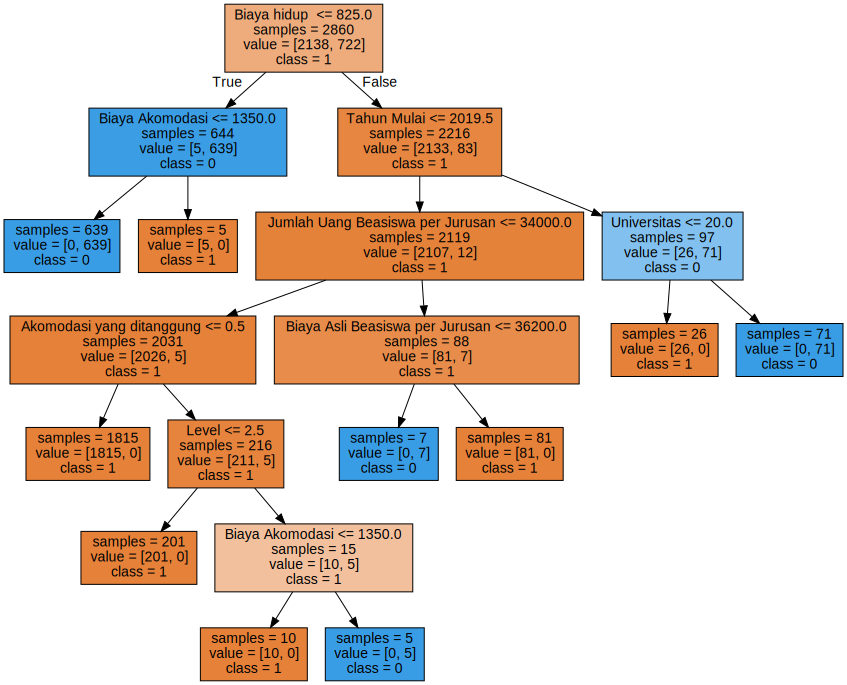

In [ ]:
graphviz.Source(dot_graph)

In [ ]:
# 33	1101	2	1	7500.0	0	0	7500.0	2	2020	9750.0	2	1000

[1]


Keterangan:
[1] berarti 'YA'
[0] berarti 'TIDAK'




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
